In [2]:
import os
os.chdir('/mnt/c/projects/audio-classification')

In [13]:
import numpy as np
import pandas as pd
from src.format_data import MelspectrogramInput

In [4]:
audio = MelspectrogramInput('train_curated')

In [16]:
pd.DataFrame(audio.data).to_csv('./data/melspectrogram_cleaned.csv')

In [20]:
pd.DataFrame(audio.target_names_single).to_csv('./data/target_names_single.csv')

In [5]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, random_state=42, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [6]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(audio.data, audio.target_single, random_state=42)

In [7]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_estimator_)

CPU times: user 27min 38s, sys: 2min 53s, total: 30min 31s
Wall time: 11min 45s
Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=50, class_weight='balanced', gamma=0.005))])


In [8]:
model = grid.best_estimator_
yfit = model.predict(Xtest)


Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

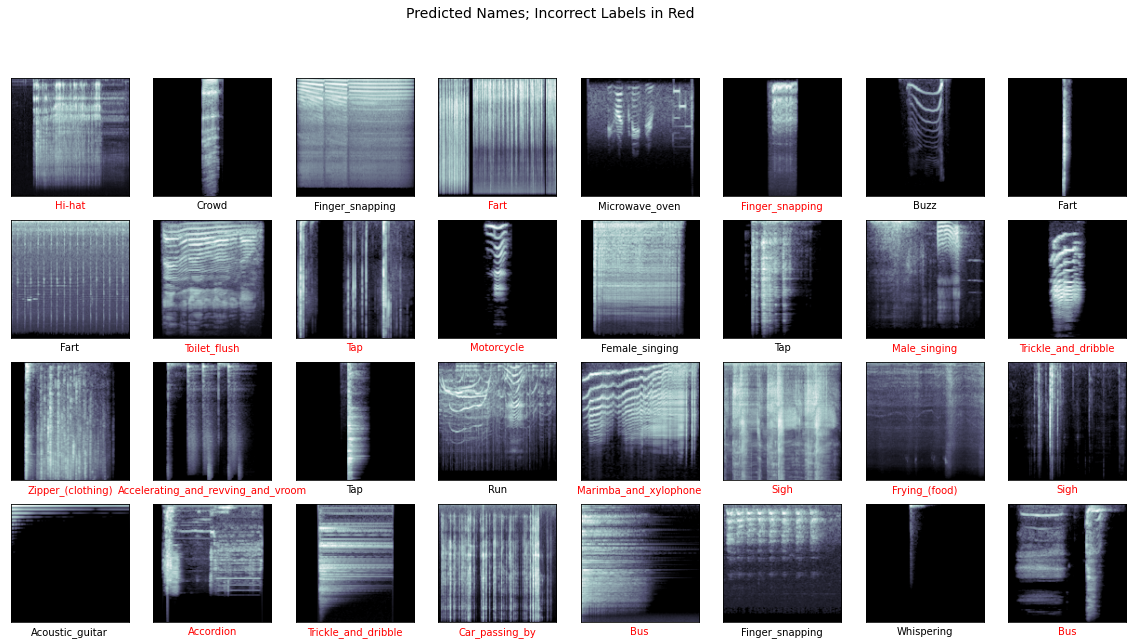

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 8, figsize=(20,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(128, 128), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(audio.target_names_single[int(yfit[i])].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit))

              precision    recall  f1-score   support

         0.0       0.29      0.20      0.24        10
         1.0       0.86      0.33      0.48        18
         2.0       1.00      0.90      0.95        20
         3.0       0.69      0.50      0.58        18
         4.0       0.62      0.68      0.65        19
         5.0       0.62      0.62      0.62        21
         6.0       0.81      1.00      0.89        17
         7.0       0.12      0.23      0.15        13
         8.0       0.29      0.38      0.33        13
         9.0       0.64      0.61      0.62        23
        10.0       0.55      0.69      0.61        16
        11.0       0.55      0.46      0.50        13
        12.0       0.33      0.45      0.38        11
        13.0       1.00      0.50      0.67         2
        14.0       0.05      0.11      0.07        19
        15.0       0.71      0.62      0.67        16
        16.0       1.00      0.50      0.67        12
        17.0       0.24    